In [1]:
import numpy as np
import matplotlib.pyplot as plt

import scipy.linalg as la

from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

In [9]:
def buildf0(x,sigma,x0):
    f0 = np.exp(-(x-x0)**2/2/sigma**2) + 2*np.exp(-(x-0.5)**2/2/0.7**2) + np.exp(-(x+0.6)**2/2/0.8**2) 
    dx = x[1]-x[0]
    return f0/np.sqrt(np.sum(f0**2)*dx)

def buildfn(x,f0,n,cVecs):
    func = np.zeros_like(x)
    for i in range(0,n+1):
        func += cVecs[n,i]*x**i*f0
        
    return func

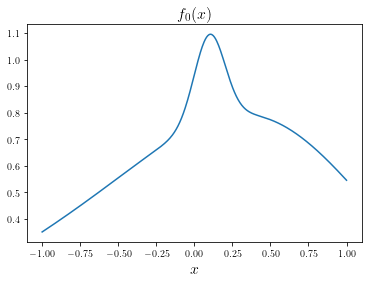

1.0

In [10]:
x = np.linspace(-1,1,501)
dx=x[1]-x[0]
sigma=0.1
x0=0.1

f0 = buildf0(x,sigma,x0)

plt.plot(x, f0)
plt.xlabel('$x$',fontsize=16)
plt.title(r'$f_0(x)$',fontsize=16)
plt.show()

sum(f0**2)*dx  #check normalisation

In [11]:
N=6 # get new orthogonal basis functions from 1 to N-1
dx=x[1]-x[0]
cVecs = np.zeros([N+1,N+1]) # rows are the n (order of f) and columns are the i (order of the polynomial in the sum to make f)
cVecs[0,0] = 1 #c_00 is always 1

#Build the matrix of overlaps. (This is really only a vector, but it's convenient to build it as a matrix like this)
Mij = np.zeros([N+1,N+1])
for i in range(0, N+1):
    for j in range(0, N+1):
        Mij[i,j] = sum(x**(i+j)*f0**2)*dx

#now we iterate and get the functions
for n in range(0,N):
        if n==0:
            #special case of getting the f1 function from the f0 function
            cVecs[1,0]=1 #set the first c value to 1
            cVecs[1,1] = -1/Mij[1,0] #get the second c value
            norm = np.einsum('ij,i,j',Mij[0:2,0:2],cVecs[1,0:2],cVecs[1,0:2]) #normalise the function in terms of its c values
            cVecs[1,:] = cVecs[1,:]/np.sqrt(norm) # renormalise the c values
            
        else:
            deltaVecTemp = np.zeros(n+1) # build the vector representing the kronecker delta on LHS of notes
            MijTemp = Mij[0,0:n+1] # get M_0j
            cVecTemp = np.einsum('mj,j->m',cVecs[0:n+1,0:n+1],MijTemp) # get c_mj
        
            # Now build Mij cmj on RHS, which is the matrix we want to invert
            MijTemp = Mij[1:n+2,0:n+1]
            Aij = np.einsum('mj,ij->mi',cVecs[0:n+1,0:n+1],MijTemp)
        
            #now solve the problem
            inhomo = deltaVecTemp - cVecTemp #the inhomogeneous term
            cVecSol = np.linalg.solve(Aij, inhomo) #solve the linear problem
            cVecs[n+1,0] = 1 #set c_0 to 1
            for i in range(1, n+2):
                cVecs[n+1,i] = cVecSol[i-1] #use solutions to define new entries
            norm = np.einsum('ij,i,j',Mij[0:n+2,0:n+2],cVecs[n+1,0:n+2],cVecs[n+1,0:n+2]) #Normalise the new basisfunction
            cVecs[n+1,:] = cVecs[n+1,:]/np.sqrt(norm) #renormalise the new basis function using the new cvecs
            

In [12]:
f1 = buildfn(x,f0,1,cVecs)
f2 = buildfn(x,f0,2,cVecs)
f3 = buildfn(x,f0,3,cVecs)
f4 = buildfn(x,f0,4,cVecs)
f5 = buildfn(x,f0,5,cVecs)

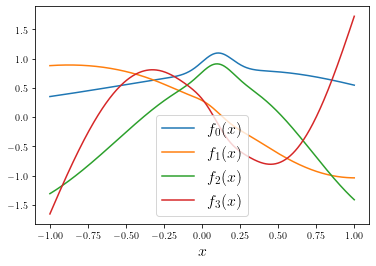

In [13]:
plt.plot(x,f0, label=r'$f_0(x)$')
plt.plot(x,f1, label=r'$f_1(x)$')
plt.plot(x,f2, label=r'$f_2(x)$')
plt.plot(x,f3, label=r'$f_3(x)$')
#plt.plot(x,f4)
#plt.plot(x,f5)
plt.xlabel(r'$x$',fontsize=16)
plt.legend(fontsize=16)
plt.show()

In [14]:
#Check orthogonality

print(sum(f1*f2)*dx)
print(sum(f1*f3)*dx)
print(sum(f1*f4)*dx)
print(sum(f1*f5)*dx)

print(sum(f2*f3)*dx)
print(sum(f2*f4)*dx)
print(sum(f2*f5)*dx)

print(sum(f3*f4)*dx)
print(sum(f3*f5)*dx)

print(sum(f4*f5)*dx)


-2.389199948993339e-16
-1.0222933610748451e-15
5.382361223382764e-16
-1.803002191991256e-15
8.721912081455238e-16
2.7249313916399866e-15
1.6413537196058329e-15
1.0800249583553532e-15
-5.979217121421249e-15
-5.14788212058193e-15


In [15]:
#Check normalisation

print(sum(f1*f1)*dx)
print(sum(f2*f2)*dx)
print(sum(f3*f3)*dx)
print(sum(f4*f4)*dx)
print(sum(f5*f5)*dx)


0.9999999999999988
1.000000000000002
0.9999999999999959
1.0000000000000044
1.0000000000000042
